In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-comments.csv
/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-posts.csv


To Do List

Preprocessing: 
* Clean data to just be about housing related ideas
* Remove any extraneous words (?)
* sentiment analysis for each subreddit
* use spacy


1. Calculate monthly average sentiment for comments from Jan 2010 to Aug 2022
2. 50 most frequently mentioned people (people/locations, positive/negative sentiment)

In [6]:
#load in data (DO NOT run with bad wifi!)
climate_ds = pd.read_csv("/kaggle/input/the-reddit-climate-change-dataset/the-reddit-climate-change-dataset-comments.csv")

In [7]:
#sanity check to make sure we are accessing data properly
climate_ds.head(3)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
0,comment,imlddn9,2qh3l,news,False,1661990368,https://old.reddit.com/r/news/comments/x2cszk/...,Yeah but what the above commenter is saying is...,0.5719,2
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/...,Any comparison of efficiency between solar and...,-0.9877,2
2,comment,imldado,2qhma,newzealand,False,1661990327,https://old.reddit.com/r/newzealand/comments/x...,I'm honestly waiting for climate change and th...,-0.1143,1


In [8]:
climate_ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600698 entries, 0 to 4600697
Data columns (total 10 columns):
 #   Column          Dtype  
---  ------          -----  
 0   type            object 
 1   id              object 
 2   subreddit.id    object 
 3   subreddit.name  object 
 4   subreddit.nsfw  bool   
 5   created_utc     int64  
 6   permalink       object 
 7   body            object 
 8   sentiment       float64
 9   score           int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 320.3+ MB


In [9]:
print(f"Total entries before filtering: {len(climate_ds)}")

# Define the words you want to look for
words_to_look_for = ['housing', 'landlord', 'house', 'home', 'apartment', 'rent', 'mortgage']

    
# create a regex, use word boundaries to prevent partial matching (like 'home' in 'homework')
pattern = '|'.join([f'\\b{word}\\b' for word in words_to_look_for])

# Filter the DataFrame for rows where 'body' contains any of the words
climate_housing_ds = climate_ds[climate_ds['body'].str.contains(pattern, case=False, na=False)]

pd.set_option('display.max_colwidth', None) #wider columns to read comment
climate_housing_ds[['body']].head(3)

Total entries before filtering: 4600698


,body
1,"Any comparison of efficiency between solar and fossil fuels is nonsensical at best and intentionally misleading at worst. In no universe is light -&gt; photovoltaic cell -&gt; electricity less efficient than light -&gt; entire food chain -&gt; biomass -&gt; decomposition -&gt; millions of years of geothermal heat and pressure -&gt; extraction -&gt; refining and transport -&gt; burning -&gt; turbine generator -&gt; electricity.\n\nUgly? More ugly than power lines, roads, apartment buildings, tractors, fences, etc etc etc? You're simply not used to it. Also, who cares? Sure, millions of people died in the displacement from sea rise, famines cause by climate change, and wars from resource scarcity, but thank God we didn't have to look at those solar panels occasionally.\n\nOffshore fracking? Fucks sake. Have you already forgotten the deepwater horizon disaster? Think about the damage that did to the gulf coast, add a few million barrels of highly toxic fracking fluid to the mix, and there you have our next major environmental disaster courtesy of offshore fracking. But oh man, those solar panels sure are ugly.\n\nStop repeating the lies fed to you by the people getting rich from fossil fuels, who couldn't care less about you or your descendants as long as they get theirs. We can deal with the less environmentally friendly aspects of solar power. We cannot deal with the consequences of continuing to pump carbon into the atmosphere. Y'all need to grow the fuck up and stop whining about the view."
12,"From California, very near the coast. We're not supposed to be hit too badly\*, but I am looking for a second home in Northern Minneapolis, Eastern Wisconsin, all of Michigan near the water, and Northeast Ohio, so i can go to once things get worse (10-15 years).\n\nI already visited a few of these places; the Cleveland suburbs were especially nice and still affordable. Duluth MN is ok, but i dont think it can handle a big influx of people. Cleveland used to be the 4th largest city in the country, so they have the infrustructure already built; they would just need to re-inforce it/rebuild it to handle an influx of people. **Let me know if you disagree, as Cleveland is my top choice right now.**\n\nYes, these places aren't that great right now, but once climate change gets worse, they will get better. IE; they are starting to experience shorter winters:[https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/](https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/)\n\n&amp;#x200B;\n\n\*\n\n* our state government is working on building more water storage and recycling as currently 50% of water that falls in the state is not harvested\n* we are only recycling about 10% of water, if we can do more it would make a big difference\n* 40% of water that is harvested is used for agriculture, only about 10% is used for cities, so we might have to stop farming so much\n* Coastal California and Bay area are not going to get too hot\n* California will only have about 1 foot of sea level rise\n\n&amp;#x200B;\n\nAlso, I recently stumbled on this youtube channel; she's a scientist talking about each state and what they can expect in the future with regards to climate change: \nhttps://www.youtube.com/c/AmericanResiliency"
15,"Or idk, climate change? Lack of affordable housing? Time out of my day? Unnecessary wear on my vehicle I can barely afford to keep running that's primary reason for existing is to get to and from work in the first place?"


Other words that can be included
'real estate agent', 'broker', 'lease','down payment', 'property tax', 'appraisal', 
'foreclosure', 'short sale', 'escrow', 'closing costs', 'commission', 
'home inspection', 'pre-approval', 'debt-to-income ratio', 'adjustable-rate mortgage',
'inventory', 'zoning','capital gains tax', 'homeowners association', 'deed'

In [10]:
climate_housing_ds.info()
climate_housing_ds.head(3)

<class 'pandas.core.frame.DataFrame'>
Index: 222447 entries, 1 to 4600691
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   type            222447 non-null  object 
 1   id              222447 non-null  object 
 2   subreddit.id    222447 non-null  object 
 3   subreddit.name  222447 non-null  object 
 4   subreddit.nsfw  222447 non-null  bool   
 5   created_utc     222447 non-null  int64  
 6   permalink       222447 non-null  object 
 7   body            222447 non-null  object 
 8   sentiment       222200 non-null  float64
 9   score           222447 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 17.2+ MB


,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/state_government_may_soon_kill_a_solar_project_in/imldbeh/,"Any comparison of efficiency between solar and fossil fuels is nonsensical at best and intentionally misleading at worst. In no universe is light -&gt; photovoltaic cell -&gt; electricity less efficient than light -&gt; entire food chain -&gt; biomass -&gt; decomposition -&gt; millions of years of geothermal heat and pressure -&gt; extraction -&gt; refining and transport -&gt; burning -&gt; turbine generator -&gt; electricity.\n\nUgly? More ugly than power lines, roads, apartment buildings, tractors, fences, etc etc etc? You're simply not used to it. Also, who cares? Sure, millions of people died in the displacement from sea rise, famines cause by climate change, and wars from resource scarcity, but thank God we didn't have to look at those solar panels occasionally.\n\nOffshore fracking? Fucks sake. Have you already forgotten the deepwater horizon disaster? Think about the damage that did to the gulf coast, add a few million barrels of highly toxic fracking fluid to the mix, and there you have our next major environmental disaster courtesy of offshore fracking. But oh man, those solar panels sure are ugly.\n\nStop repeating the lies fed to you by the people getting rich from fossil fuels, who couldn't care less about you or your descendants as long as they get theirs. We can deal with the less environmentally friendly aspects of solar power. We cannot deal with the consequences of continuing to pump carbon into the atmosphere. Y'all need to grow the fuck up and stop whining about the view.",-0.9877,2
12,comment,imlca5e,4tly53,collapseprep,False,1661989877,https://old.reddit.com/r/CollapsePrep/comments/x2awmq/when_you_are_a_climate_refugee_where_do_you_go/imlca5e/,"From California, very near the coast. We're not supposed to be hit too badly\*, but I am looking for a second home in Northern Minneapolis, Eastern Wisconsin, all of Michigan near the water, and Northeast Ohio, so i can go to once things get worse (10-15 years).\n\nI already visited a few of these places; the Cleveland suburbs were especially nice and still affordable. Duluth MN is ok, but i dont think it can handle a big influx of people. Cleveland used to be the 4th largest city in the country, so they have the infrustructure already built; they would just need to re-inforce it/rebuild it to handle an influx of people. **Let me know if you disagree, as Cleveland is my top choice right now.**\n\nYes, these places aren't that great right now, but once climate change gets worse, they will get better. IE; they are starting to experience shorter winters:[https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/](https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/)\n\n&amp;#x200B;\n\n\*\n\n* our state government is working on building more water storage and recycling as currently 50% of water that falls in the state is not harvested\n* we are only recycling about 10% of water, if we can do more it would make a big difference\n* 40% of water that is harvested is used for agriculture, only about 10% is used for cities, so we might have to stop farming so much\n* Coastal California and Bay area are not going to get too hot\n* California will only have about 1 foot of sea level rise\n\n&amp;#x200B;\n\nAlso, I recently stumbled on this youtube channel; she's a scientist talking about each state and what they can expect in the future with regards to climate change: \nhttps://www.youtube.com/c/AmericanResiliency",-0.8048,9
15,comment,imlc2xd,2qi2i,portland,False,1661989788,https://old.reddit.com/r/Portland/comments/x2ilvq/hundreds_of_portland_city_workers_resist_calls_to/imlc2xd/,"Or idk, climate change? Lack of affordable housing? Time out of my day? Unnecessary wear on my vehicle I can bar

In [12]:
climate_housing_ds.head(3)

,type,id,subreddit.id,subreddit.name,subreddit.nsfw,created_utc,permalink,body,sentiment,score
1,comment,imldbeh,2qn7b,ohio,False,1661990340,https://old.reddit.com/r/Ohio/comments/x2awnp/state_government_may_soon_kill_a_solar_project_in/imldbeh/,"Any comparison of efficiency between solar and fossil fuels is nonsensical at best and intentionally misleading at worst. In no universe is light -&gt; photovoltaic cell -&gt; electricity less efficient than light -&gt; entire food chain -&gt; biomass -&gt; decomposition -&gt; millions of years of geothermal heat and pressure -&gt; extraction -&gt; refining and transport -&gt; burning -&gt; turbine generator -&gt; electricity.\n\nUgly? More ugly than power lines, roads, apartment buildings, tractors, fences, etc etc etc? You're simply not used to it. Also, who cares? Sure, millions of people died in the displacement from sea rise, famines cause by climate change, and wars from resource scarcity, but thank God we didn't have to look at those solar panels occasionally.\n\nOffshore fracking? Fucks sake. Have you already forgotten the deepwater horizon disaster? Think about the damage that did to the gulf coast, add a few million barrels of highly toxic fracking fluid to the mix, and there you have our next major environmental disaster courtesy of offshore fracking. But oh man, those solar panels sure are ugly.\n\nStop repeating the lies fed to you by the people getting rich from fossil fuels, who couldn't care less about you or your descendants as long as they get theirs. We can deal with the less environmentally friendly aspects of solar power. We cannot deal with the consequences of continuing to pump carbon into the atmosphere. Y'all need to grow the fuck up and stop whining about the view.",-0.9877,2
12,comment,imlca5e,4tly53,collapseprep,False,1661989877,https://old.reddit.com/r/CollapsePrep/comments/x2awmq/when_you_are_a_climate_refugee_where_do_you_go/imlca5e/,"From California, very near the coast. We're not supposed to be hit too badly\*, but I am looking for a second home in Northern Minneapolis, Eastern Wisconsin, all of Michigan near the water, and Northeast Ohio, so i can go to once things get worse (10-15 years).\n\nI already visited a few of these places; the Cleveland suburbs were especially nice and still affordable. Duluth MN is ok, but i dont think it can handle a big influx of people. Cleveland used to be the 4th largest city in the country, so they have the infrustructure already built; they would just need to re-inforce it/rebuild it to handle an influx of people. **Let me know if you disagree, as Cleveland is my top choice right now.**\n\nYes, these places aren't that great right now, but once climate change gets worse, they will get better. IE; they are starting to experience shorter winters:[https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/](https://www.cleveland19.com/2022/02/05/has-it-really-been-bad-winter-so-far/)\n\n&amp;#x200B;\n\n\*\n\n* our state government is working on building more water storage and recycling as currently 50% of water that falls in the state is not harvested\n* we are only recycling about 10% of water, if we can do more it would make a big difference\n* 40% of water that is harvested is used for agriculture, only about 10% is used for cities, so we might have to stop farming so much\n* Coastal California and Bay area are not going to get too hot\n* California will only have about 1 foot of sea level rise\n\n&amp;#x200B;\n\nAlso, I recently stumbled on this youtube channel; she's a scientist talking about each state and what they can expect in the future with regards to climate change: \nhttps://www.youtube.com/c/AmericanResiliency",-0.8048,9
15,comment,imlc2xd,2qi2i,portland,False,1661989788,https://old.reddit.com/r/Portland/comments/x2ilvq/hundreds_of_portland_city_workers_resist_calls_to/imlc2xd/,"Or idk, climate change? Lack of affordable housing? Time out of my day? Unnecessary wear on my vehicle I can bar

In [13]:
#get the subreddits that appear the most often
#pd.set_option('display.max_colwidth', None) #wider columns to read comment
#climate_housing_ds[['body']].head(3)

subreddit_counts = climate_housing_ds['subreddit.name'].value_counts()
print(subreddit_counts)

subreddit.name
politics                 20242
worldnews                11152
askreddit                 8655
collapse                  4800
canada                    3786
                         ...  
istj                         1
howtodraw101                 1
zoning                       1
ihaveihaveihavereddit        1
politicspdfs                 1
Name: count, Length: 9410, dtype: int64


In [14]:
#splice our dataset based on the top 5 (politics, worldnews, askreddit, collapse, canada

subreddits_to_keep = ['politics', 'worldnews', 'askreddit', 'collapse', 'canada']

# Filter the DataFrame to only include rows where 'subreddit.name' is in subreddits_to_keep
top_climate_housing_ds = climate_housing_ds[climate_housing_ds['subreddit.name'].isin(subreddits_to_keep)]

# Display the filtered DataFrame
top_climate_housing_ds.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48635 entries, 94 to 4600508
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   type            48635 non-null  object 
 1   id              48635 non-null  object 
 2   subreddit.id    48635 non-null  object 
 3   subreddit.name  48635 non-null  object 
 4   subreddit.nsfw  48635 non-null  bool   
 5   created_utc     48635 non-null  int64  
 6   permalink       48635 non-null  object 
 7   body            48635 non-null  object 
 8   sentiment       48612 non-null  float64
 9   score           48635 non-null  int64  
dtypes: bool(1), float64(1), int64(2), object(6)
memory usage: 3.8+ MB


In [163]:
top_climate_housing_ds.head(3)

type       id subreddit.id subreddit.name  subreddit.nsfw  \
94   comment  iml7b24        2qh68         canada           False   
488  comment  imkhg8x        2qhw9       collapse           False   
747  comment  imk0xzr        2cneq       politics           False   

     created_utc  \
94    1661987686   
488   1661977297   
747   1661971118   

                                                                                                     permalink  \
94      https://old.reddit.com/r/canada/comments/x2ii0u/trudeaus_green_obsession_is_canadas_nightmare/iml7b24/   
488                     https://old.reddit.com/r/collapse/comments/x0frmn/climate_disasters_last_week/imkhg8x/   
747  https://old.reddit.com/r/politics/comments/x2kjj3/ny_post_biden_is_crushing_trump_so_republicans/imk0xzr/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [15]:
#use stopwords to get rid of excess words
#this takes too long to run!
import re
import spacy

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

nlp = spacy.load('en_core_web_sm')

stopwords = nlp.Defaults.stop_words
len(stopwords)

nlp.Defaults.stop_words -= {"no", "not"} #preserve negative sentiment

#short function to process the text
def preprocess(comment):
    doc = nlp(comment)
    
    processed_words_list = []
    for token in doc:
        if not token.is_punct and not token.like_url and not token.is_stop:
            processed_words_list.append(token.lemma_.strip().lower())
    return ' '.join(processed_words_list)

top_climate_housing_ds['tokens'] = top_climate_housing_ds['body'].apply(preprocess)

KeyboardInterrupt: 

In [38]:
#convert utc time
pd.reset_option('display.max_colwidth') #reset column size

#climate_housing_ds['date_time'] = pd.to_datetime(climate_housing_ds['created_utc'], unit='s')

top_climate_housing_ds.loc[:, 'date_time'] = pd.to_datetime(top_climate_housing_ds['created_utc'], unit='s')

top_climate_housing_ds.loc[:, 'year'] = top_climate_housing_ds['date_time'].dt.year
top_climate_housing_ds.loc[:, 'month'] = top_climate_housing_ds['date_time'].dt.month
top_climate_housing_ds.loc[:, 'day'] = top_climate_housing_ds['date_time'].dt.day


top_climate_housing_ds.loc[:, 'period'] = top_climate_housing_ds['year'].astype(str) + '-' + top_climate_housing_ds['month'].apply(lambda x: f'{x:02d}')

pd.set_option('display.max_colwidth', None)
top_climate_housing_ds.head(3)

type       id subreddit.id subreddit.name  subreddit.nsfw  \
94   comment  iml7b24        2qh68         canada           False   
488  comment  imkhg8x        2qhw9       collapse           False   
747  comment  imk0xzr        2cneq       politics           False   

     created_utc  \
94    1661987686   
488   1661977297   
747   1661971118   

                                                                                                     permalink  \
94      https://old.reddit.com/r/canada/comments/x2ii0u/trudeaus_green_obsession_is_canadas_nightmare/iml7b24/   
488                     https://old.reddit.com/r/collapse/comments/x0frmn/climate_disasters_last_week/imkhg8x/   
747  https://old.reddit.com/r/politics/comments/x2kjj3/ny_post_biden_is_crushing_trump_so_republicans/imk0xzr/   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                         

In [40]:
pd.reset_option('display.max_colwidth') #reset view size

#calculate average sentiment per month

monthly_avg_sentiment = (top_climate_housing_ds.groupby(['period'])['sentiment'].mean()).reset_index()

#renaming the sentiment column to 'avg_sentiment'
monthly_avg_sentiment.rename(columns={'sentiment': 'avg_sentiment'}, inplace=True)

print(monthly_avg_sentiment)

      period  avg_sentiment
0    2010-01       0.236393
1    2010-02      -0.220017
2    2010-03       0.209640
3    2010-04       0.007296
4    2010-05       0.045800
..       ...            ...
147  2022-04       0.010076
148  2022-05      -0.071854
149  2022-06      -0.080691
150  2022-07      -0.054381
151  2022-08      -0.005058

[152 rows x 2 columns]


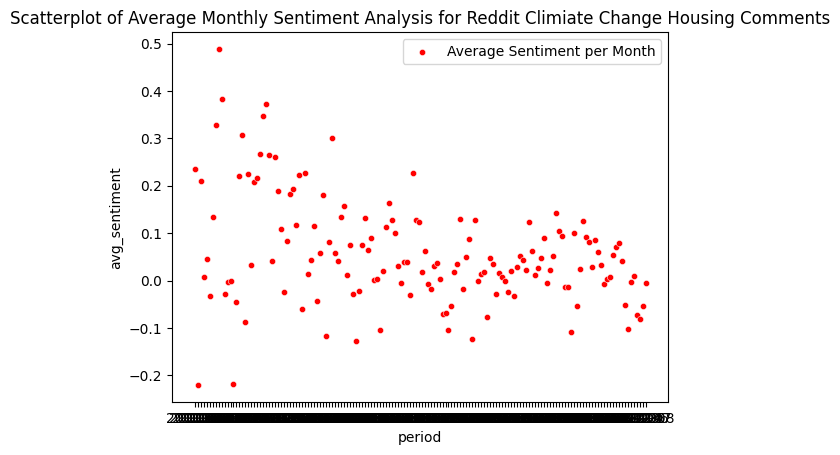

In [25]:
#import packages
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import networkx as nx

#plot a scatter plot
sns.scatterplot(x='period', y='avg_sentiment', data=monthly_avg_sentiment, color='red', marker='o', s=20, label='Average Sentiment per Month')
plt.title('Scatterplot of Average Monthly Sentiment Analysis for Reddit Climiate Change Housing Comments')
plt.legend()
plt.show()

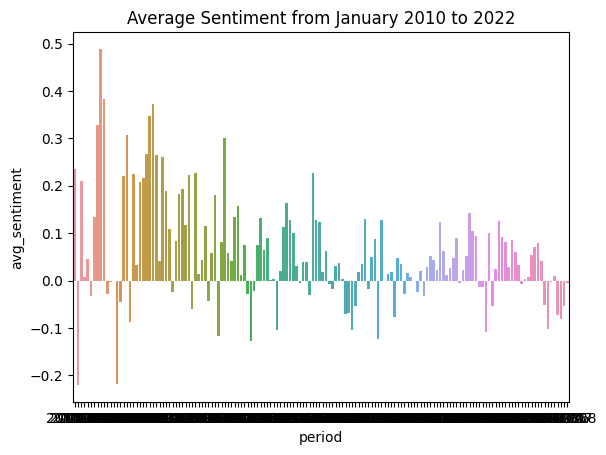

In [41]:
#plot a bar chart for all data
sns.barplot(x = 'period',
            y = 'avg_sentiment',
            data = monthly_avg_sentiment)
plt.title('Average Sentiment from January 2010 to 2022')
# Show the plot
plt.show()

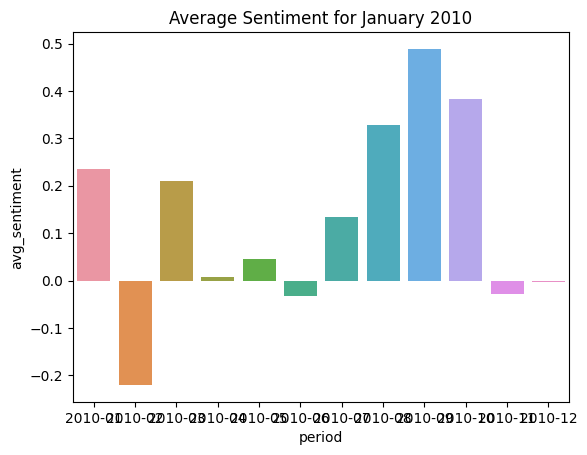

In [42]:
#plot a bar chart for 2010
year_2010_data = monthly_avg_sentiment[monthly_avg_sentiment['period'].str.contains('2010')]
sns.barplot(x = 'period',
            y = 'avg_sentiment',
            data = year_2010_data)
plt.title('Average Sentiment for January 2010')
# Show the plot
plt.show()

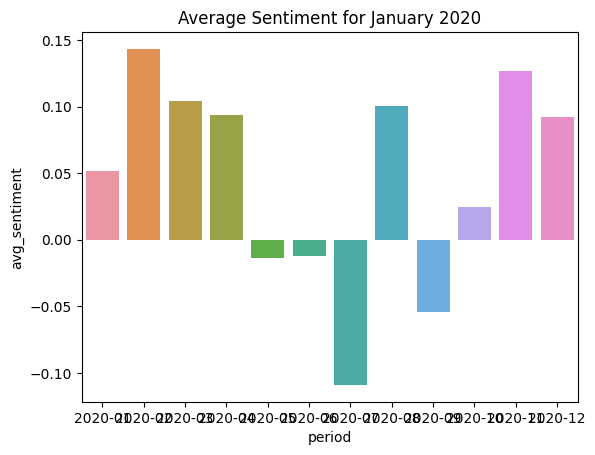

In [43]:
#plot a bar chart for 2020
year_2020_data = monthly_avg_sentiment[monthly_avg_sentiment['period'].str.contains('2020')]
sns.barplot(x = 'period',
            y = 'avg_sentiment',
            data = year_2020_data)
plt.title('Average Sentiment for January 2020')
# Show the plot
plt.show()

In [44]:
print(monthly_avg_sentiment.columns)


Index(['period', 'avg_sentiment'], dtype='object')


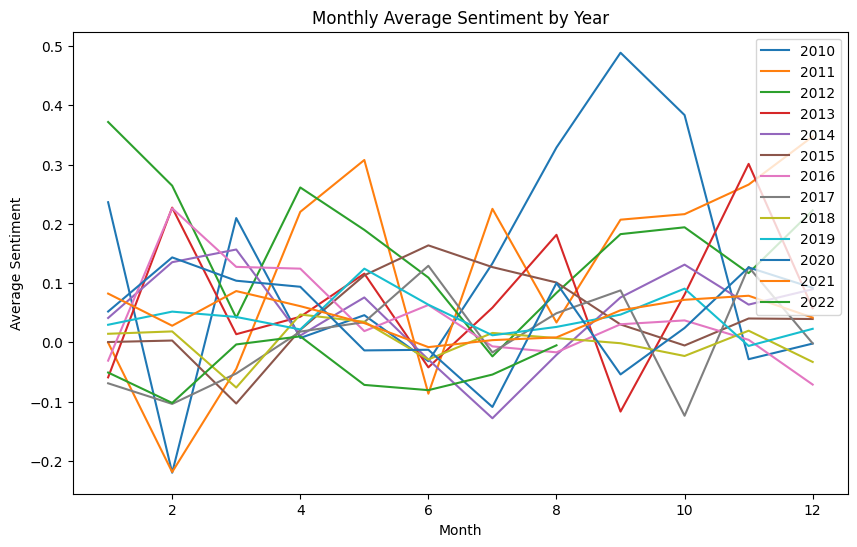

In [45]:
#plot each year on top of one another as a line chart for comparison

# Ensure 'period' is in datetime format and set as index
monthly_avg_sentiment['period'] = pd.to_datetime(monthly_avg_sentiment['period'])
monthly_avg_sentiment.set_index('period', inplace=True)

# Pivoting the data
pivoted_data = monthly_avg_sentiment.pivot_table(index=monthly_avg_sentiment.index.month, 
                                             columns=monthly_avg_sentiment.index.year,
                                             values='avg_sentiment',
                                             aggfunc='mean')

# Plotting
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for year in pivoted_data.columns:
    plt.plot(pivoted_data.index, pivoted_data[year], label=year)

plt.legend()
plt.title('Monthly Average Sentiment by Year')
plt.xlabel('Month')
plt.ylabel('Average Sentiment')
plt.show()


In [ ]:
#extract human names using spacy!

import spacy
import pandas as pd
from collections import Counter

# Load the small English model
english_nlp = spacy.load('en_core_web_sm')

# Your DataFrame is named climate_ds
comments = climate_housing_ds['body'].dropna()  # Drop missing values

# Counter to keep track of name occurrences
name_counter = Counter()

# Process each comment
for comment in comments:
    spacy_parser = english_nlp(comment)
    for entity in spacy_parser.ents:
        if entity.label_ == 'PERSON':  # Check if the entity is a person's name
            name_counter[entity.text] += 1  # Increment the counter for the found name

# Get the 50 most common names
top_50_names = name_counter.most_common(50)

# Display the top 50 names and their occurrence counts
for name, count in top_50_names:
    print(f"Name: {name}, Occurrences: {count}")